In [1]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15738 non-null  int64  
 1   review          15738 non-null  float64
 2   text            15738 non-null  object 
 3   review_year     15738 non-null  int64  
 4   publisher       15738 non-null  object 
 5   categories      15738 non-null  object 
 6   published_year  15738 non-null  int64  
 7   helpfulness     15738 non-null  float64
 8   num_row         15738 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [3]:
df_rating_books_processed = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [4]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15738 non-null  int64  
 1   num_row             15738 non-null  int64  
 2   text_clean          15738 non-null  object 
 3   text_complexity     15738 non-null  float64
 4   compound_sentiment  15738 non-null  float64
 5   word_count          15738 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 737.8+ KB


In [5]:
df_vader_sentiment_processed = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment_processed.sample()

num_row                                         text_clean  \
5680     5680  good book buy latest version edition one older...   

      text_complexity  compound_sentiment  word_count  
5680              4.2              0.7003          15

In [6]:
df_all_data_processed = df_rating_books_processed.merge(df_vader_sentiment_processed, on='num_row', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15738 non-null  float64
 1   text                15738 non-null  object 
 2   review_year         15738 non-null  int64  
 3   publisher           15738 non-null  object 
 4   categories          15738 non-null  object 
 5   published_year      15738 non-null  int64  
 6   helpfulness         15738 non-null  float64
 7   num_row             15738 non-null  int64  
 8   text_clean          15738 non-null  object 
 9   text_complexity     15738 non-null  float64
 10  compound_sentiment  15738 non-null  float64
 11  word_count          15738 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.4+ MB


In [7]:
#Original Text is removed as clean text is added
df_all_data_processed = df_all_data_processed.drop(['text'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15738 non-null  float64
 1   review_year         15738 non-null  int64  
 2   publisher           15738 non-null  object 
 3   categories          15738 non-null  object 
 4   published_year      15738 non-null  int64  
 5   helpfulness         15738 non-null  float64
 6   num_row             15738 non-null  int64  
 7   text_clean          15738 non-null  object 
 8   text_complexity     15738 non-null  float64
 9   compound_sentiment  15738 non-null  float64
 10  word_count          15738 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 1.3+ MB


In [8]:
df_all_data_processed = df_all_data_processed.drop(['num_row'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              15738 non-null  float64
 1   review_year         15738 non-null  int64  
 2   publisher           15738 non-null  object 
 3   categories          15738 non-null  object 
 4   published_year      15738 non-null  int64  
 5   helpfulness         15738 non-null  float64
 6   text_clean          15738 non-null  object 
 7   text_complexity     15738 non-null  float64
 8   compound_sentiment  15738 non-null  float64
 9   word_count          15738 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 1.2+ MB


In [9]:
df_all_data_processed.sample(10)

review  review_year       publisher categories  published_year  \
14083     5.0         2012           Other    Fiction            2005   
14791     5.0         2012           Other      Other            2010   
10155     5.0         2006  Harper Collins    Fiction            2005   
3544      3.0         2010           Other    Fiction            2004   
1729      5.0         2013           Other      Other            2008   
360       5.0         2010           Other    Fiction            2004   
14351     5.0         2005           Other      Other            2004   
3688      5.0         2008           Other      Other            2005   
7116      5.0         2007           Other   Religion            2006   
10399     1.0         2012           Other    Fiction            2011   

       helpfulness                                         text_clean  \
14083     1.000000  wow would reccommend every one typin tjis kind...   
14791     1.000000  purchased book daughter freshman college recei...   
10155     1.000000  really really like book read several time hope...   
3544      1.000000  pleasant quick read goff doe understand birder...   
1729      0.500000  also requested gift christmas found new copy r...   
360       1.000000  bought kindle always enjoy ease getting book k...   
14351     0.857143  book offer serious well informed insider view ...   
3688      1.000000  read released never forget feeling dread finis...   
7116      1.000000  daily devotional one use consistently day conc...   
10399     1.000000  thankfully bought holiday special price worth ...   

       text_complexity  compound_sentiment  word_count  
14083              5.5              0.7716          36  
14791              3.7              0.0000          10  
10155              7.8              0.8797          21  
3544               2.5              0.5106          10  
1729               3.5              0.7003          13  
360                3.8              0.9214          33  
14351             11.7              0.9448          42  
3688               9.0             -0.7334         122  
7116               9.3              0.9274          37  
10399              6.6              0.9001          14

In [ ]:
# def custom_string_to_list(s):
#     if isinstance(s, str):
#         return [item.strip(" '[]") for item in s.split(',')]
#     else:
#         return s

In [ ]:
# df_all_data_processed['categories'] = df_all_data_processed['categories'].apply(custom_string_to_list)

In [10]:
ordered_columns = ['categories', 'publisher', 'published_year', 'review_year', 'helpfulness', 'text_clean','compound_sentiment','text_complexity','word_count', 'review']

In [11]:
df_all_data_processed = df_all_data_processed[ordered_columns]

In [12]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories          15738 non-null  object 
 1   publisher           15738 non-null  object 
 2   published_year      15738 non-null  int64  
 3   review_year         15738 non-null  int64  
 4   helpfulness         15738 non-null  float64
 5   text_clean          15738 non-null  object 
 6   compound_sentiment  15738 non-null  float64
 7   text_complexity     15738 non-null  float64
 8   word_count          15738 non-null  int64  
 9   review              15738 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.2+ MB


In [13]:
df_all_data_processed.sample(10)

categories     publisher  published_year  review_year  helpfulness  \
12667    Fiction         Other            2009         2012          1.0   
11976      Other  Random House            2010         2012          1.0   
9569       Other         Other            2008         2008          0.4   
12363      Other         Other            2005         2012          1.0   
8229     Fiction         Other            2008         2012          0.8   
14616      Other         Other            2005         2010          1.0   
12569    Fiction         Other            2004         2008          1.0   
2501   Self-Help         Other            2005         2008          1.0   
7703     Fiction         Other            2010         2012          1.0   
7580       Other         Other            2004         2005          1.0   

                                              text_clean  compound_sentiment  \
12667  favorite series sherlock holmes classic always...              0.8519   
11976  enjoyed along book written john grisham sure w...              0.8074   
9569   highly toxic sweetener known aspartame pronoun...              0.9337   
12363  used help diagnose issue starter step step ins...              0.6705   
8229   review edition published simon brown got editi...             -0.6353   
14616  used book number year shifted new school copy ...              0.0772   
12569  year setting london holmes observes number sma...              0.9260   
2501   search philosophy modern world book interestin...              0.6003   
7703   read book quoted shade grey trilogy like read ...              0.9678   
7580   great read thoroughly enjoyed hergenrader nove...              0.9809   

       text_complexity  word_count  review  
12667              5.2          18     5.0  
11976              3.4          12     5.0  
9569               7.5         167     5.0  
12363              5.9          18     5.0  
8229               6.9          55     1.0  
14616             14.2          14     5.0  
12569             15.3         150     3.0  
2501              13.0          65     5.0  
7703               9.0          81     4.0  
7580               5.6          44     5.0

In [14]:
df_all_data_processed['publisher'] = pd.Categorical(df_all_data_processed['publisher'])
df_all_data_processed['categories'] = pd.Categorical(df_all_data_processed['categories'])

In [15]:
df_final = df_all_data_processed.copy()
df_final.to_csv('../data/final/df_final.csv')

# Train Test Split


In [16]:
#Divide Data Set into Train Test Datasets
X = df_final.copy().drop(['review'], axis=1)
y = df_final['review'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1530) #stratify: para definir los datasets de forma proporcional acorde a y.

X_train.sample(5)

categories           publisher  published_year  review_year  \
1877       Other               Other            2006         2010   
9885     Fiction       Mariner Books            2012         2012   
14627    Fiction  Simon and Schuster            2009         2012   
14969   Religion               Other            2013         2013   
2109       Other               Other            2005         2005   

       helpfulness                                         text_clean  \
1877      1.000000  came back trip utah hungry know geology first ...   
9885      1.000000  think hobbit one best story ever writen filled...   
14627     1.000000  patricia cornwell amazing kay scarpetta series...   
14969     1.000000  condensed series lecture barth gave standing r...   
2109      0.212766  would gluten free bible everything else ever r...   

       compound_sentiment  text_complexity  word_count  
1877               0.9633              7.4          42  
9885               0.6369              3.3          13  
14627              0.7906              5.2          22  
14969              0.7579              9.8          30  
2109               0.9774              6.0          67

In [17]:
df_train = X_train.copy()
df_train['review'] = y.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11803 entries, 1226 to 14826
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   categories          11803 non-null  category
 1   publisher           11803 non-null  category
 2   published_year      11803 non-null  int64   
 3   review_year         11803 non-null  int64   
 4   helpfulness         11803 non-null  float64 
 5   text_clean          11803 non-null  object  
 6   compound_sentiment  11803 non-null  float64 
 7   text_complexity     11803 non-null  float64 
 8   word_count          11803 non-null  int64   
 9   review              11803 non-null  float64 
dtypes: category(2), float64(4), int64(3), object(1)
memory usage: 853.7+ KB


# Analysis and EDA for target feature

In [18]:
df_train['review'].value_counts()

review
5.0    6970
4.0    2408
3.0    1052
1.0     761
2.0     612
Name: count, dtype: int64

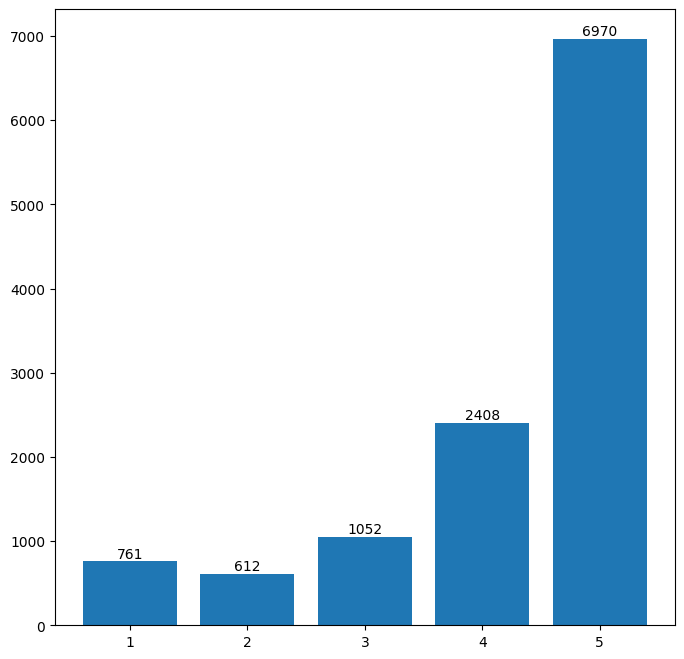

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['review'].value_counts(ascending=True).keys(), df_train['review'].value_counts(ascending=True))
ax.bar_label(bars)
plt.show()

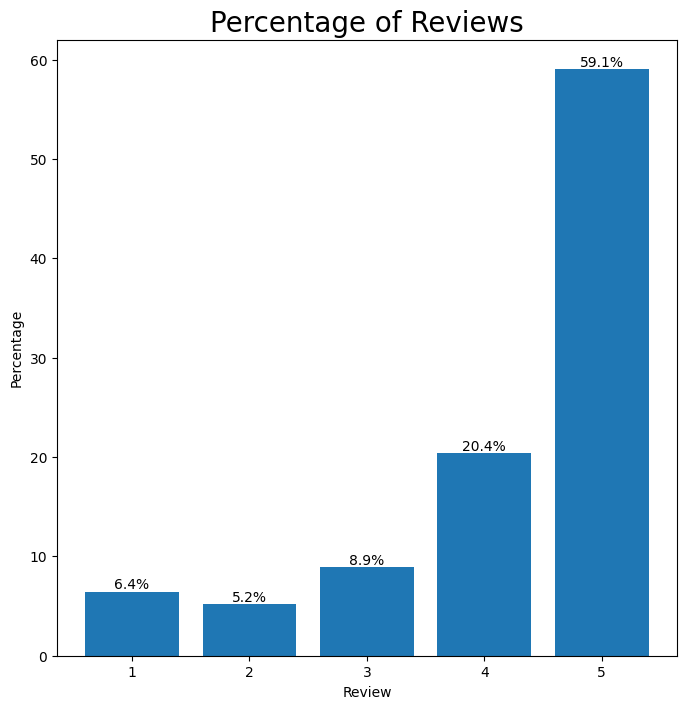

In [20]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['review'].value_counts(ascending=True).keys(), (df_train['review'].value_counts(ascending=True))/(df_train['review'].value_counts(ascending=True).sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

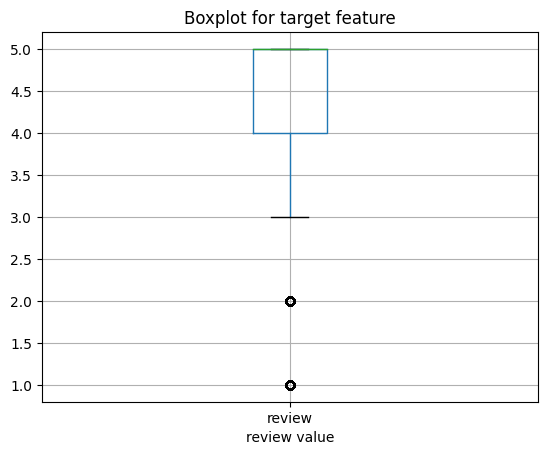

In [21]:
#Create a box plot to check for outliers, median and quartiles
df_train.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [22]:
df_train['review'].describe().T

count    11803.000000
mean         4.204270
std          1.194041
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.5% of the entries with a High/Postive review [4, 5]. Only 11.6% of the entries have a Low/Negative review [1, 2]. And 8.9% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile above 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [23]:
categories = df_train['categories']
categories.info()

<class 'pandas.core.series.Series'>
Index: 11803 entries, 1226 to 14826
Series name: categories
Non-Null Count  Dtype   
--------------  -----   
11803 non-null  category
dtypes: category(1)
memory usage: 104.1 KB


In [24]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 10


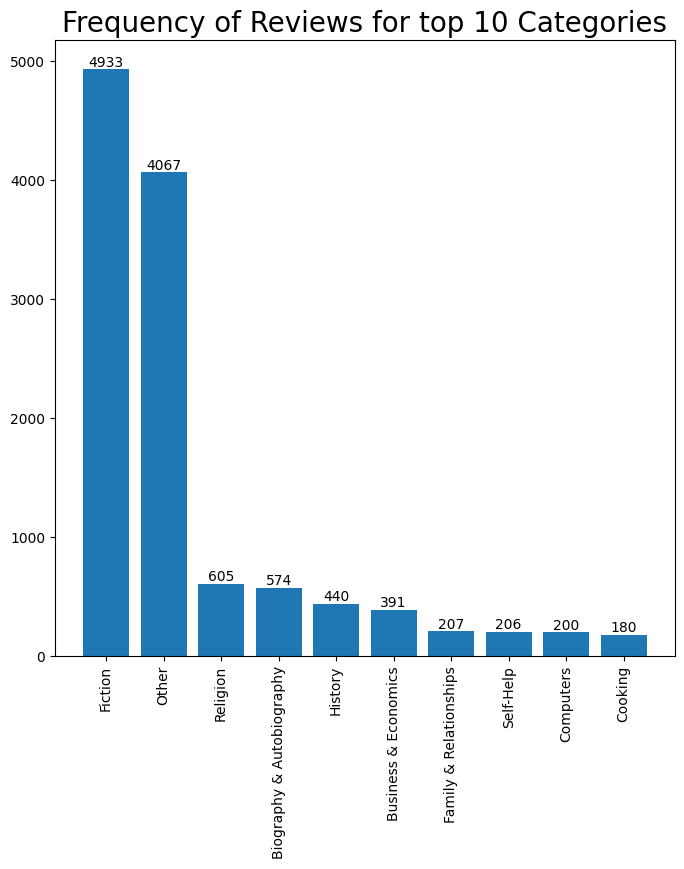

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['categories'].value_counts(ascending=False).keys(), df_train['categories'].value_counts(ascending=False))
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

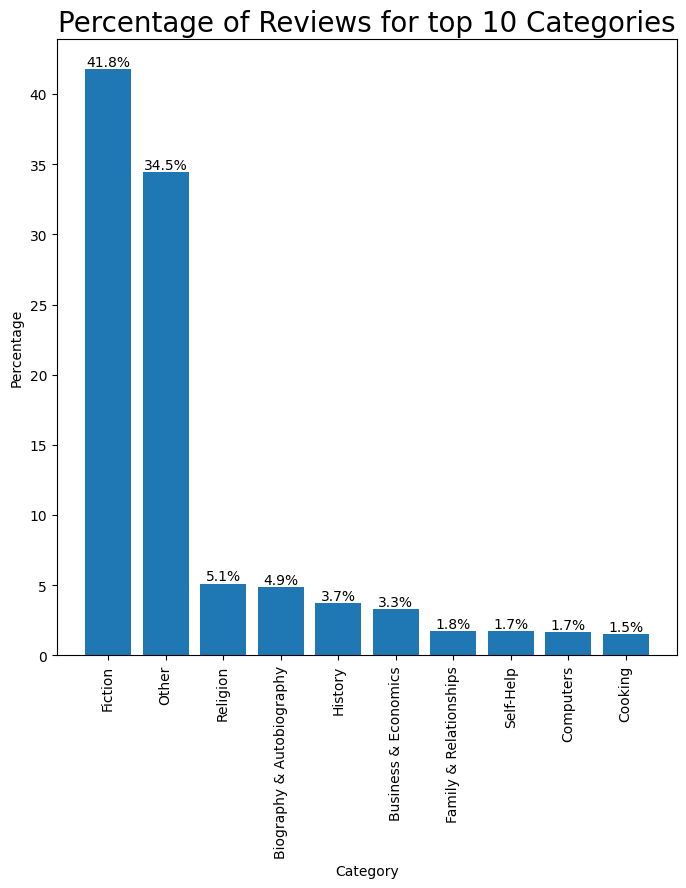

In [26]:
#Show a barplot by Percentages
category_percetage = df_train['categories'].value_counts(ascending=False)/df_train['categories'].value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['categories'].value_counts(ascending=False).keys(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

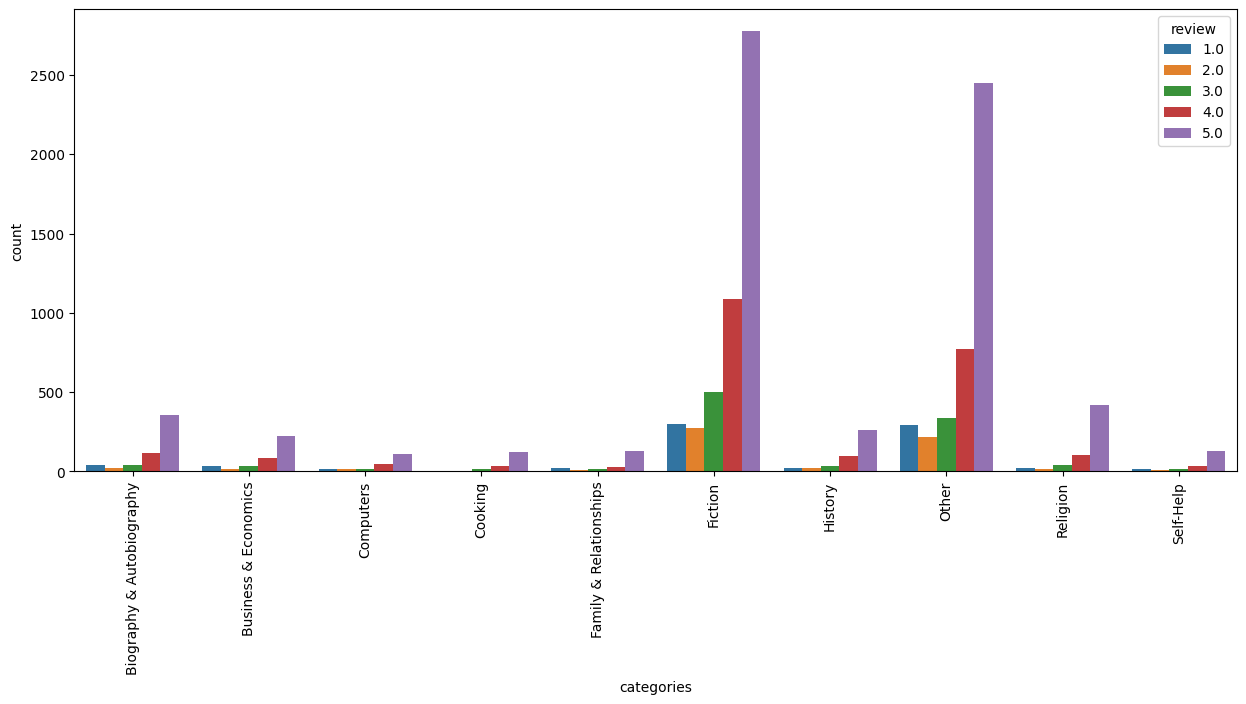

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_train, x = 'categories', hue='review')
plt.xticks(rotation=90)
plt.show()

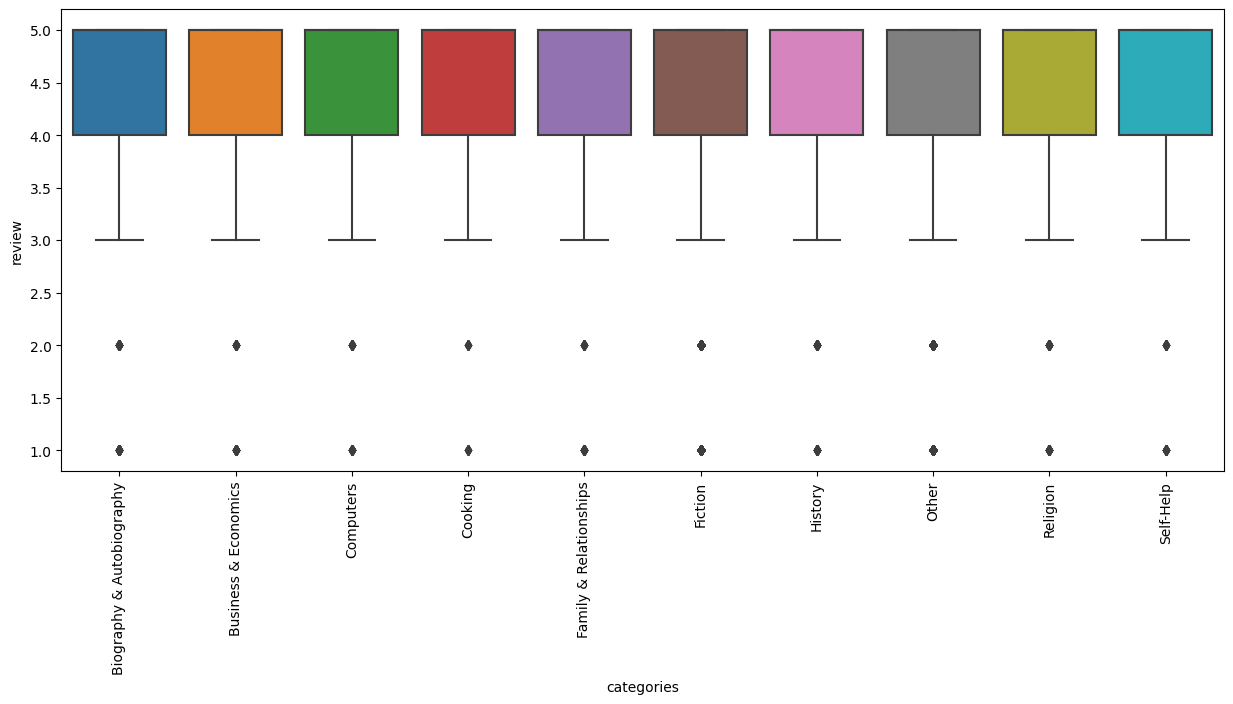

In [28]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=df_train)
plt.xticks(rotation=90)
plt.show()

In [29]:
df_train['categories'].unique()

['Other', 'Business & Economics', 'Fiction', 'Biography & Autobiography', 'Religion', 'Family & Relationships', 'Cooking', 'Computers', 'Self-Help', 'History']
Categories (10, object): ['Biography & Autobiography', 'Business & Economics', 'Computers', 'Cooking', ..., 'History', 'Other', 'Religion', 'Self-Help']

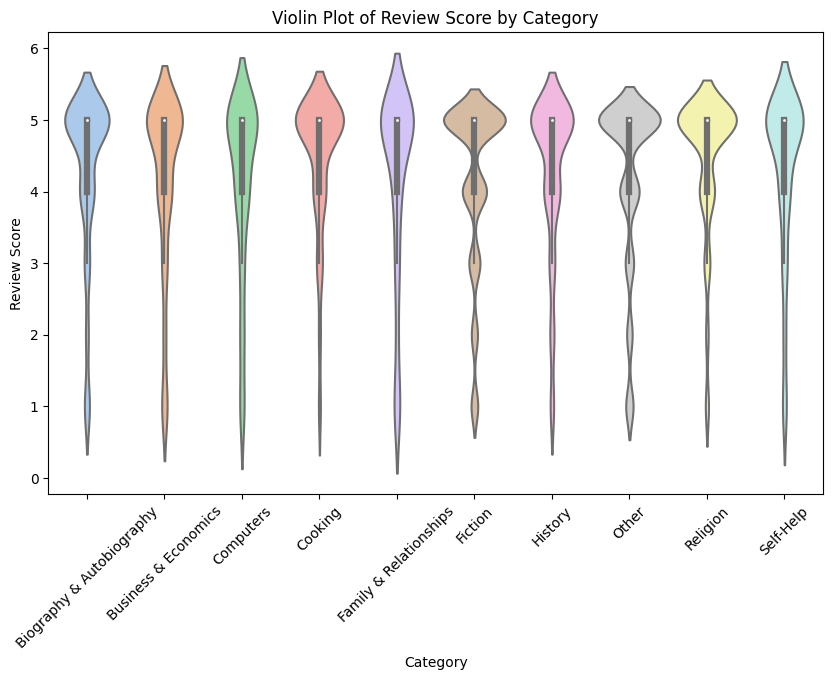

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='categories', y='review', data=df_train, palette='pastel')
plt.xlabel('Category')
plt.ylabel('Review Score')
plt.title('Violin Plot of Review Score by Category')
plt.xticks(rotation=45) 
plt.show()

### Key Findings for Categories:

- There are 10 different Categories in the Dataset.
- All of the reviewed categories contains reviews values in the 5 Categories [1, 2, 3, 4, 5]. All of the are biased to high review score.
- All categories but have lower quartile limit in Rating of 4 and minimum values of 3, but with outliers in 1 and 2 score reviews groups.
- 'Fiction' is most rated category. This category is biased to High review scores, having the mediana on 5. And the 25% quartile on 4.

## Published Year

In [31]:
pub_year = df_train[['published_year','review']]
pub_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11803 entries, 1226 to 14826
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   published_year  11803 non-null  int64  
 1   review          11803 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 276.6 KB


In [32]:
pub_year = pub_year.groupby('published_year')['review'].agg(['mean', 'count']).reset_index()
pub_year

published_year      mean  count
0            2004  4.148699   2152
1            2005  4.196481   2387
2            2006  4.053156   1505
3            2007  4.154392   1127
4            2008  4.240462    865
5            2009  4.264851   1212
6            2010  4.175538    883
7            2011  4.245902    610
8            2012  4.504301    930
9            2013  4.492424    132

In [33]:
pub_year['published_year'].describe().T

count      10.00000
mean     2008.50000
std         3.02765
min      2004.00000
25%      2006.25000
50%      2008.50000
75%      2010.75000
max      2013.00000
Name: published_year, dtype: float64

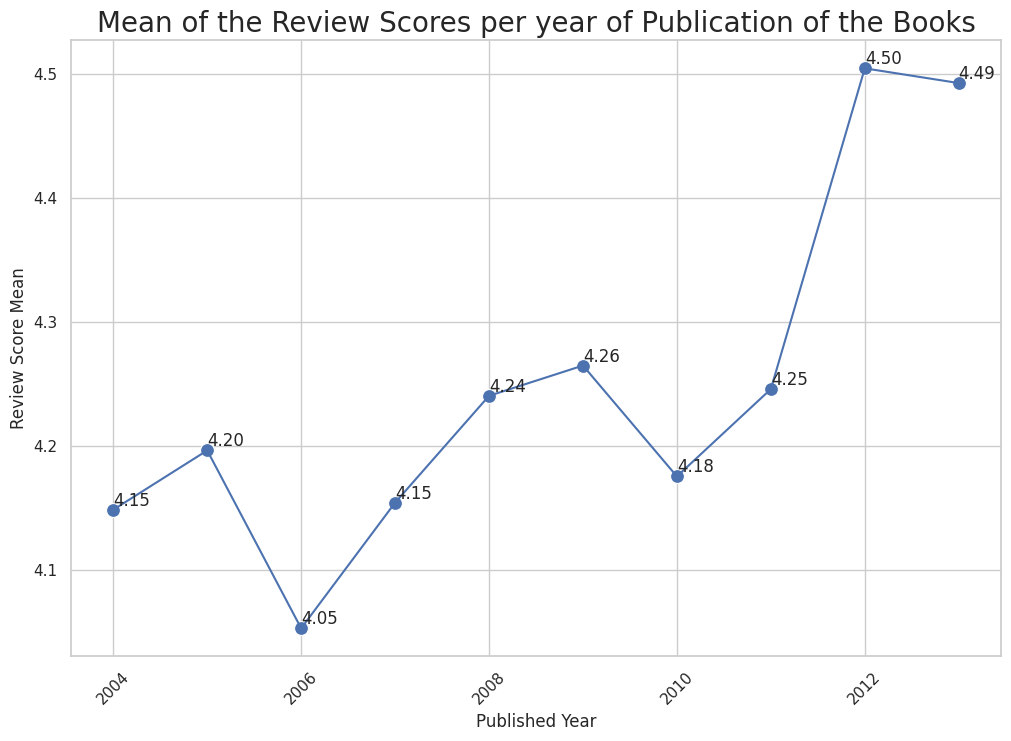

In [34]:
sns.set(style="whitegrid")  # Establecer el estilo de la cuadrícula
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de líneas con Seaborn
sns.lineplot(x=pub_year['published_year'], y=pub_year['mean'], linestyle='-')

sns.scatterplot(x=pub_year['published_year'], y=pub_year['mean'], color='b', s=100)

for i, row in pub_year.iterrows():
    plt.text(row['published_year'], row['mean'], f'{row["mean"]:.2f}', ha='left', va='bottom')

# Personalizar etiquetas y título
plt.xlabel('Published Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores per year of Publication of the Books', fontsize=20)
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [35]:
df_train[(df_train['published_year']>=2004) & ((df_train['published_year']>=2010))]['categories'].value_counts()

categories
Fiction                      1432
Other                         684
Religion                      121
Biography & Autobiography     104
History                        73
Business & Economics           63
Family & Relationships         31
Cooking                        25
Self-Help                      18
Computers                       4
Name: count, dtype: int64

In [36]:
df_train[((df_train['published_year']>2010))]['categories'].value_counts()

categories
Fiction                      985
Other                        444
Religion                      68
History                       57
Biography & Autobiography     55
Business & Economics          20
Family & Relationships        20
Self-Help                     10
Cooking                        9
Computers                      4
Name: count, dtype: int64

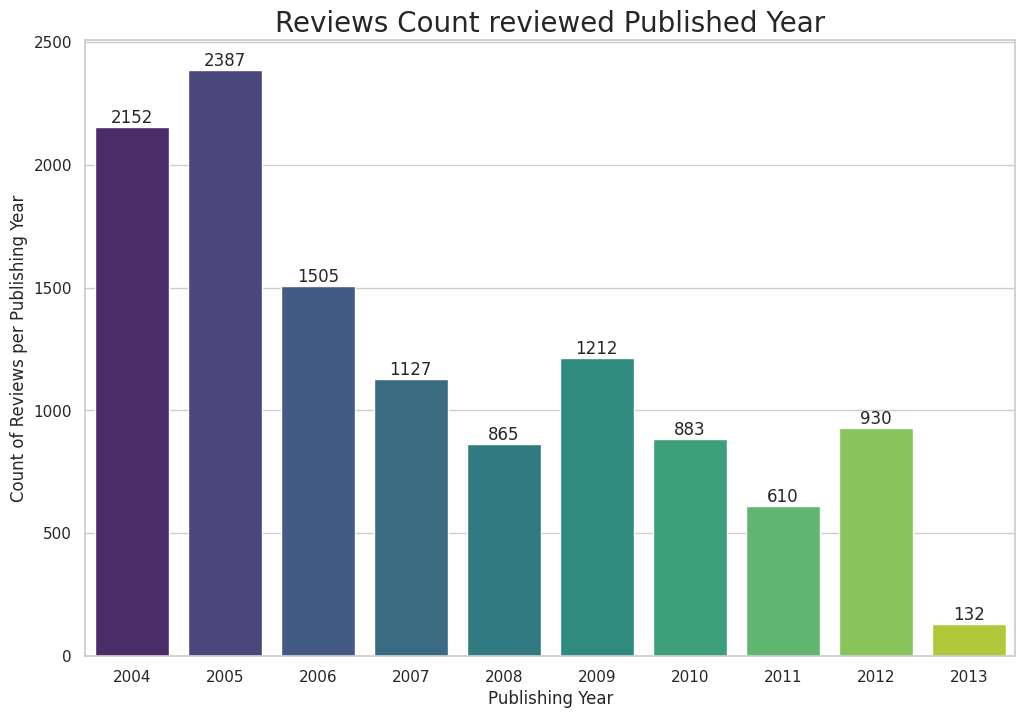

In [37]:

sns.set(style="whitegrid")  
plt.figure(figsize=(12, 8))  

ax = sns.barplot(x=pub_year['published_year'], y=pub_year['count'], palette="viridis")

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.title('Reviews Count reviewed Published Year', fontsize=20)
plt.ylabel('Count of Reviews per Publishing Year')
plt.xlabel('Publishing Year')

plt.show()

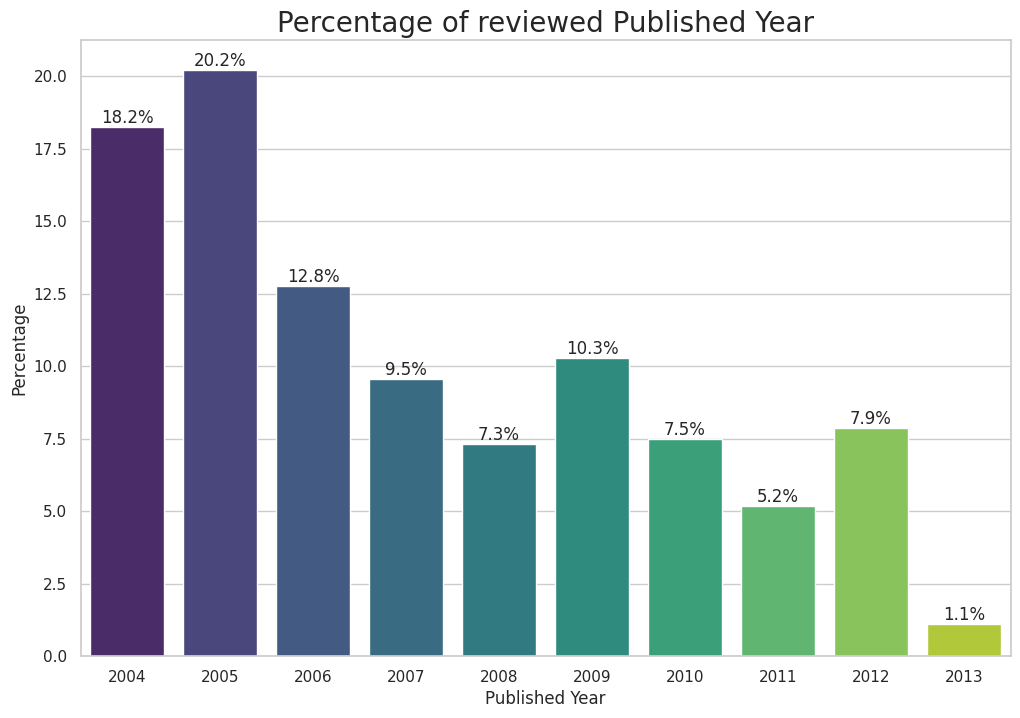

In [38]:
pub_year_percentage = (pub_year['count'] / pub_year['count'].sum()) * 100

sns.set(style="whitegrid")  # Establecer el estilo de la cuadrícula
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=pub_year['published_year'], y=pub_year_percentage, palette="viridis")

# Agregar etiquetas de porcentaje en las barras
for bar, percentage in zip(ax.patches, pub_year_percentage):
    ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

# Personalizar etiquetas y título
plt.xlabel('Published Year')
plt.ylabel('Percentage')
plt.title('Percentage of reviewed Published Year', fontsize=20)

# Mostrar el gráfico
plt.show()

In [39]:
import plotly.express as px

fig = px.box(df_train, x='published_year', y='review')

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Boxplot of Reviews by Published Year',
    title_x=0.5,
    xaxis_title='Published Year',
    yaxis_title='Review',
    xaxis=dict(
        tickangle=-45,        
    )
)

# Mostrar el gráfico interactivo
fig.show()

In [40]:
df_train[['published_year', 'review']].corr().style.background_gradient(cmap='Blues')

### Key Findings for Published Year

- All of the reviews for Published years, are biased to high scores. Having the quartile 25% above 4.
- Books published during the initial years of the dataset, namely 2004, 2005, and 2006, encompass 51.2% of the total dataset reviews. These years represent the period of highest activity.
- The average review score remains consistently between 4 and 4.5 across all the years of publication in the dataset


## Helpfulness

In [41]:
df_train.sample(2)

categories publisher  published_year  review_year  \
2549   Business & Economics     Other            2006         2006   
10925                 Other     Other            2007         2010   

       helpfulness                                         text_clean  \
2549           0.0  successful men met used book organize business...   
10925          1.0  great road map tiki place always carry book tr...   

       compound_sentiment  text_complexity  word_count  review  
2549               0.8979              9.1          16     5.0  
10925              0.7769              5.5          31     5.0

In [42]:
df_train['helpfulness'].describe().T

count    11803.000000
mean         0.821560
std          0.314801
min          0.000000
25%          0.750000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness, dtype: float64

In [43]:
#Create a box plot to check for outliers, median and quartiles
fig = px.box(df_train, y='helpfulness')

fig.update_xaxes(title_text='')
fig.update_layout(
    title='Boxplot for Helpfulness Feature',
    title_x=0.5        
)

fig.show()

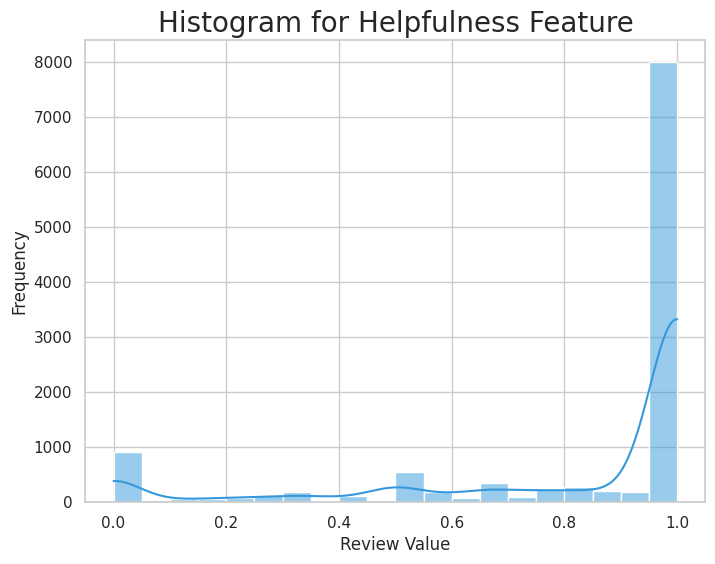

In [44]:
# df_train.hist(column='helpfulness')
# plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_train['helpfulness'], bins=20, kde=True, color='#3498db')
plt.xlabel("Review Value")
plt.ylabel("Frequency")
plt.title("Histogram for Helpfulness Feature", fontsize=20)
plt.show()

In [45]:
#Correlation Analysis 
df_train[['helpfulness','review']].corr().style.background_gradient(cmap='Blues')

In [46]:

# Create an interactive box plot using Plotly
fig = px.box(df_train, x='review', y='helpfulness')

fig.update_layout(
    title='Box Plot of Review vs Helpfulness',
    xaxis_title='Review',
    yaxis_title='Helpfulness',
    title_x=0.5
)

# Show the interactive plot
fig.show()

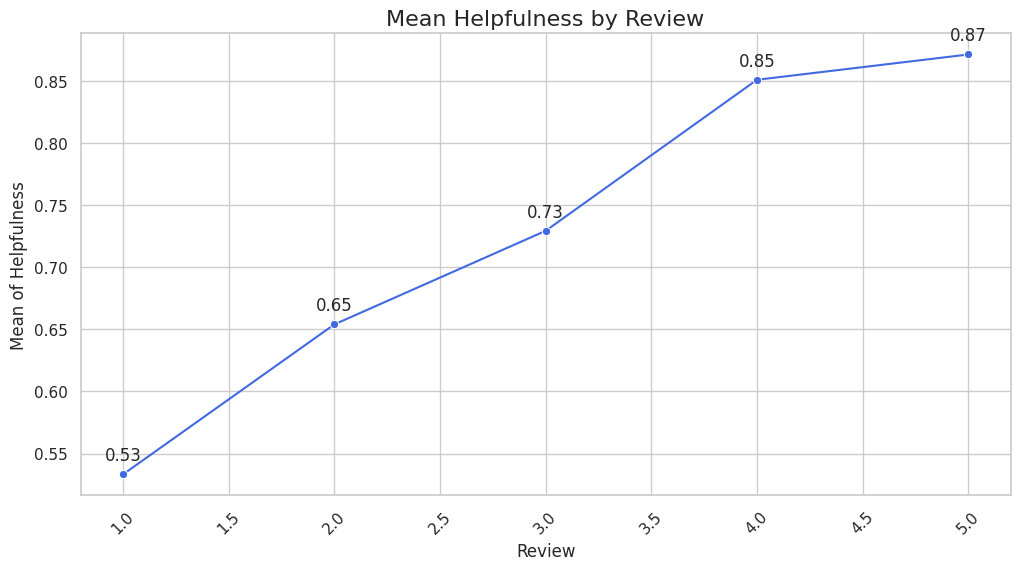

In [47]:
helpfulness_by_review = df_train.groupby('review')['helpfulness'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=helpfulness_by_review.index, y=helpfulness_by_review.values, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Review')
plt.ylabel('Mean of Helpfulness')
plt.title('Mean Helpfulness by Review', fontsize=16)
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels to each point
for x, y in zip(helpfulness_by_review.index, helpfulness_by_review.values):
    plt.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()

<Figure size 1200x600 with 0 Axes>

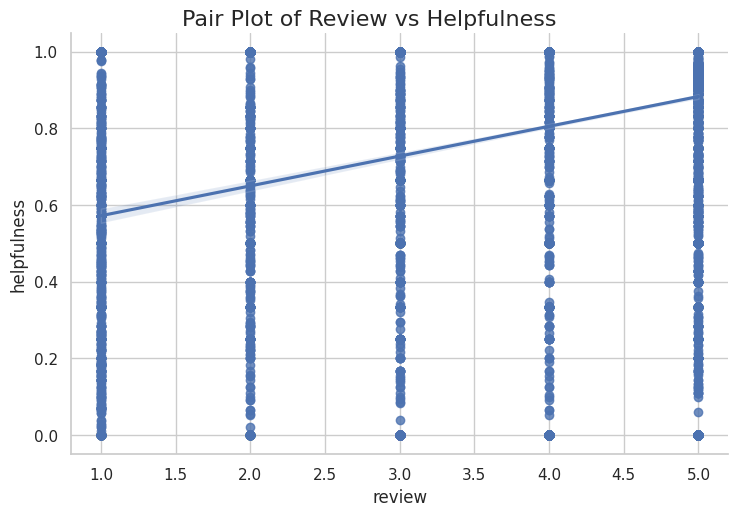

In [48]:
plt.figure(figsize=(12, 6))
sns.pairplot(df_train, x_vars=['review'], y_vars=['helpfulness'], kind='reg', height=5, aspect=1.5)
plt.suptitle('Pair Plot of Review vs Helpfulness', y=1.02, fontsize=16)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

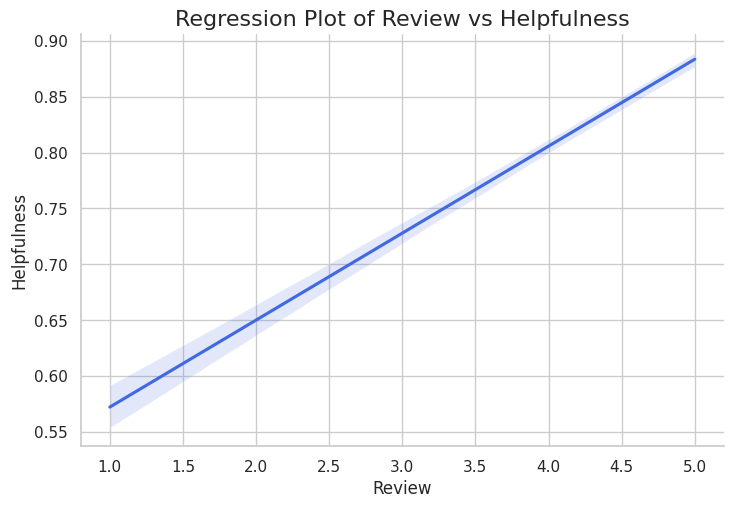

In [49]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='review', y='helpfulness', data=df_train, height=5, aspect=1.5, scatter=False, line_kws={"color": "royalblue"})
plt.xlabel('Review')
plt.ylabel('Helpfulness')
plt.title('Regression Plot of Review vs Helpfulness', fontsize=16)
plt.grid(True)
plt.show()

### Key Findings for helpfulness

- Reviews with a high review score are found more helpfull than reviews with low review score.
- Mean of the helpfulness and review have a linear relationship.
- Helpfulness vs review regression plot confirms the linear relation between the variables.

## Review_Year

In [50]:
rev_year = df_train[['review_year','review']]
rev_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11803 entries, 1226 to 14826
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_year  11803 non-null  int64  
 1   review       11803 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 276.6 KB


In [51]:
rev_year = rev_year.groupby('review_year')['review'].agg(['mean', 'count']).reset_index()
rev_year

review_year      mean  count
0         2004  4.079681    502
1         2005  4.147203   1019
2         2006  4.071033   1084
3         2007  4.180804    896
4         2008  4.078283    792
5         2009  4.102345    938
6         2010  4.138734   1074
7         2011  4.148515   1313
8         2012  4.300729   2607
9         2013  4.441065   1578

In [53]:
rev_year['review_year'].describe().T

count      10.00000
mean     2008.50000
std         3.02765
min      2004.00000
25%      2006.25000
50%      2008.50000
75%      2010.75000
max      2013.00000
Name: review_year, dtype: float64

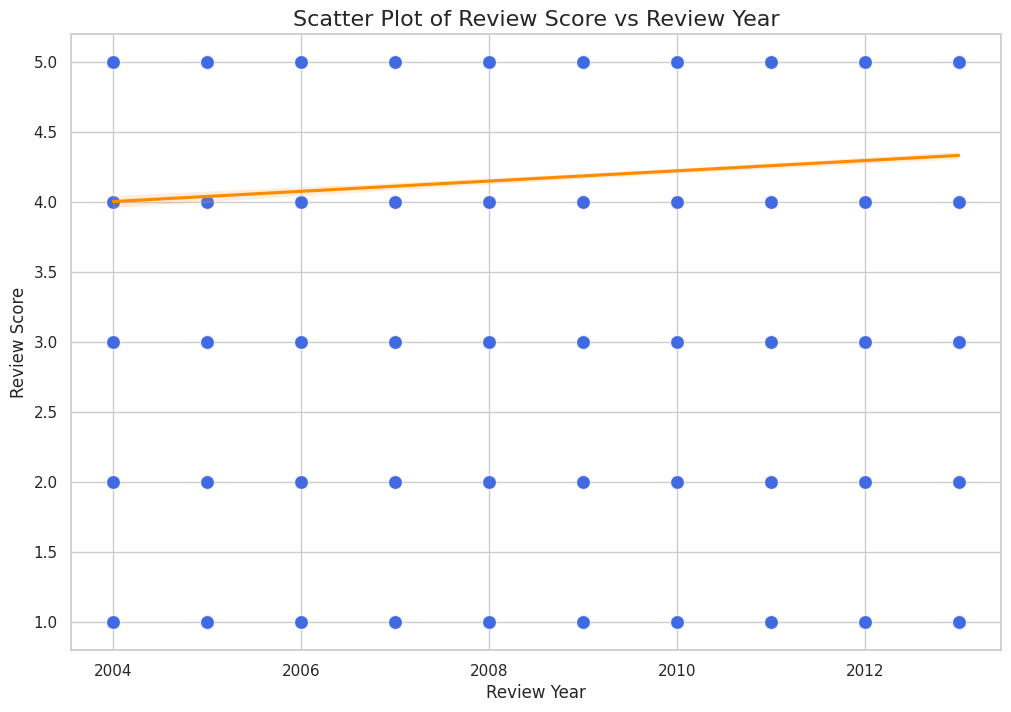

In [54]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='review_year', y='review', data=df_all_data_processed, color='royalblue', alpha=0.7, edgecolor='w', s=100)
sns.regplot(x='review_year', y='review', data=df_all_data_processed, scatter=False, color='darkorange')
plt.xlabel('Review Year')
plt.ylabel('Review Score')
plt.title('Scatter Plot of Review Score vs Review Year', fontsize=16)
plt.grid(True)
plt.show()

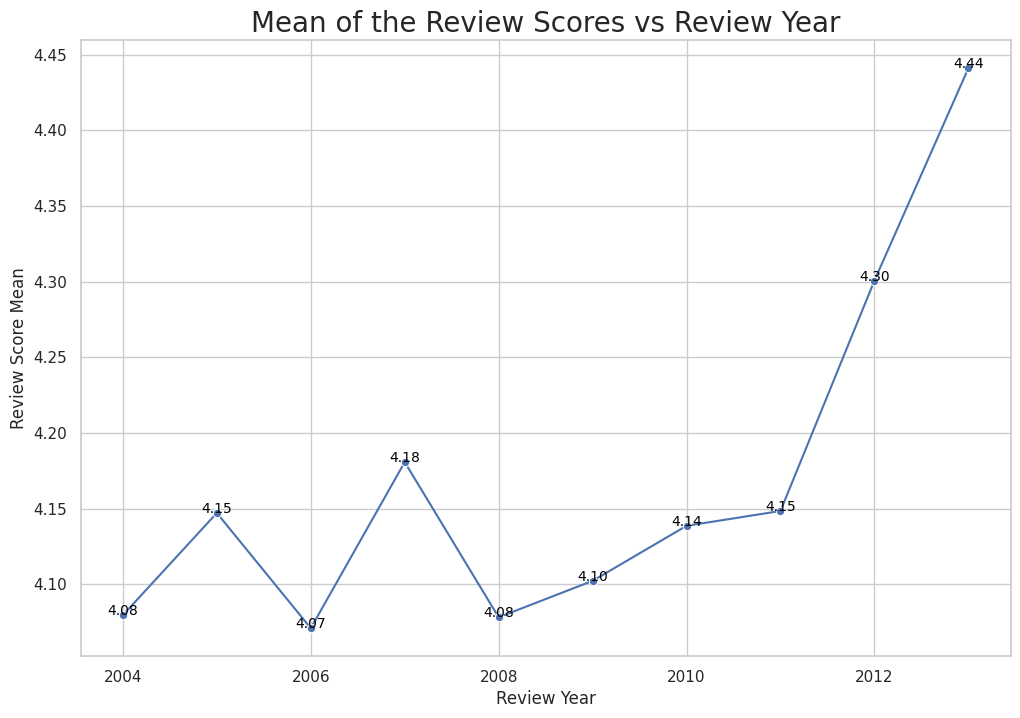

In [55]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=rev_year, x='review_year', y='mean', marker='o', linestyle='-')
plt.xlabel('Review Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores vs Review Year', fontsize=20)
plt.grid(True)

# Add labels to the points
for line in range(0, rev_year.shape[0]):
    ax.text(rev_year['review_year'][line], rev_year['mean'][line], f'{rev_year["mean"][line]:.2f}', horizontalalignment='center', fontsize=10, color='black')

plt.show()

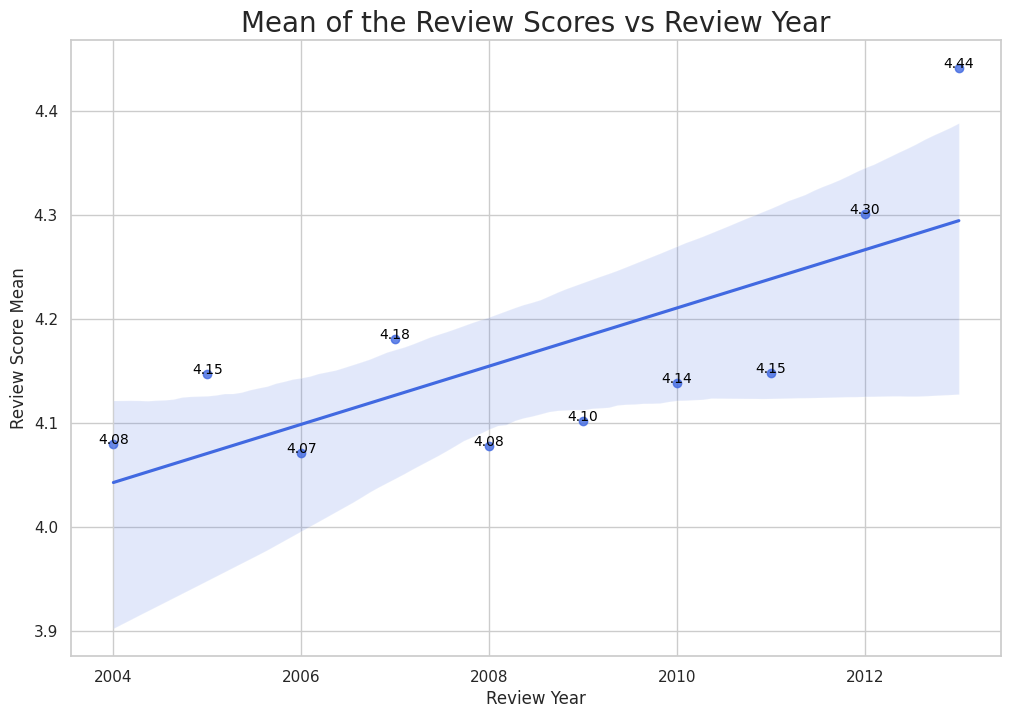

In [56]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(data=rev_year, x='review_year', y='mean', color='royalblue')
plt.xlabel('Review Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores vs Review Year', fontsize=20)
plt.grid(True)

# Add labels to the points
for line in range(0, rev_year.shape[0]):
    ax.text(rev_year['review_year'][line], rev_year['mean'][line], f'{rev_year["mean"][line]:.2f}', horizontalalignment='center', fontsize=10, color='black')

plt.show()

In [57]:
df_train[['review_year', 'review']].corr().style.background_gradient(cmap='Blues')

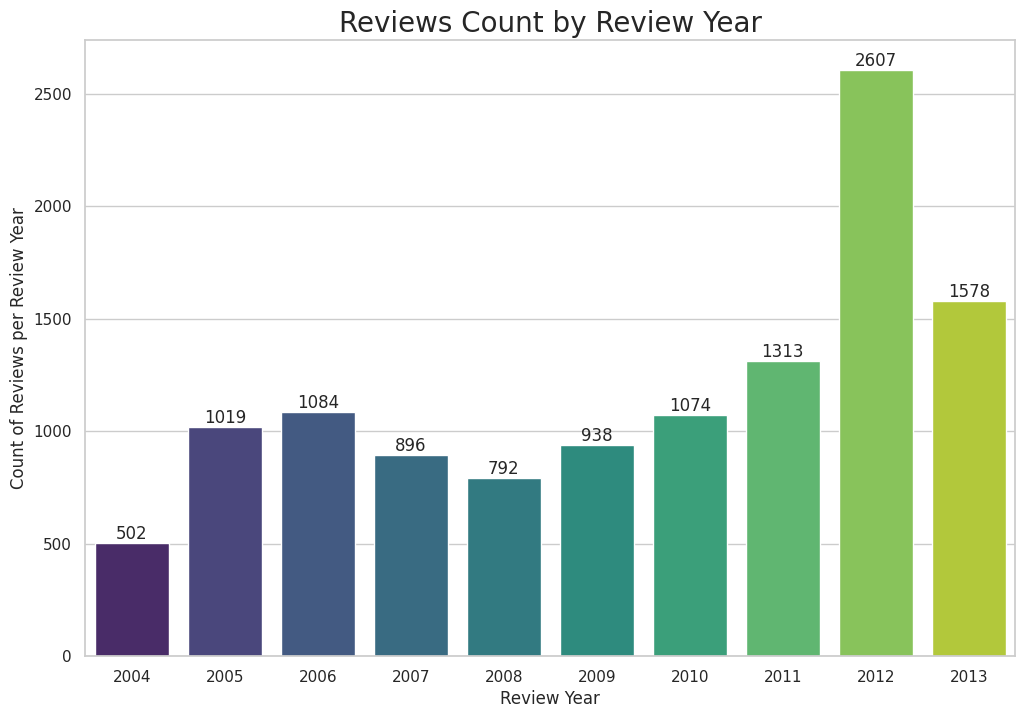

In [58]:
sns.set(style="whitegrid")  
plt.figure(figsize=(12, 8))  

ax = sns.barplot(x=rev_year['review_year'], y=rev_year['count'], palette="viridis")

for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.title('Reviews Count by Review Year', fontsize=20)
plt.ylabel('Count of Reviews per Review Year')
plt.xlabel('Review Year')

plt.show()

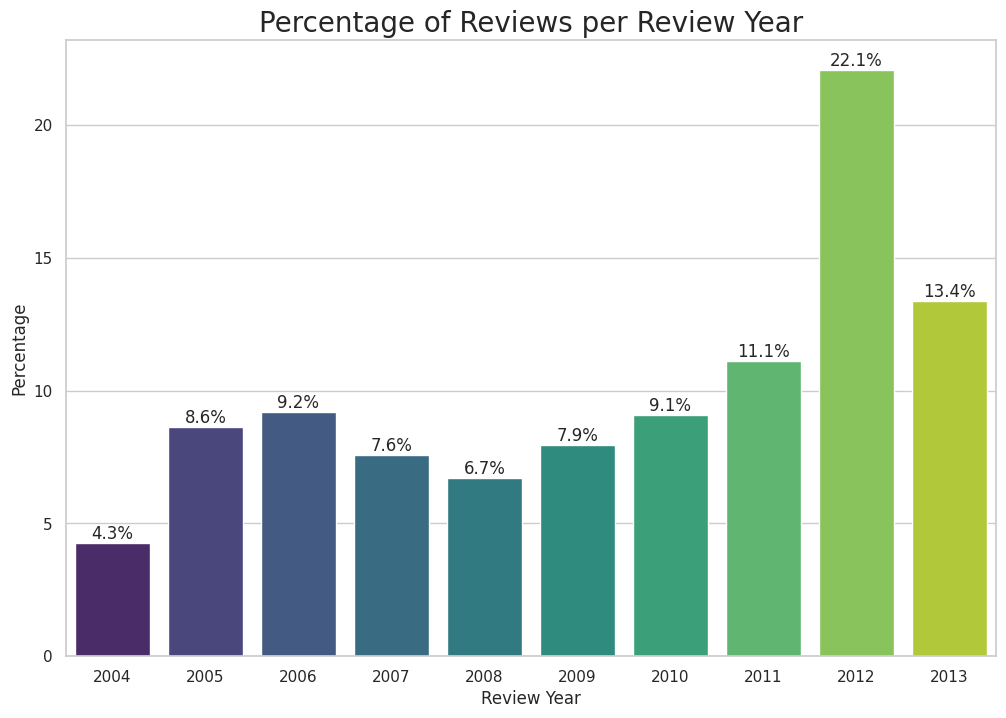

In [59]:
rev_year_percentage = (rev_year['count'] / rev_year['count'].sum()) * 100

sns.set(style="whitegrid")  # Establecer el estilo de la cuadrícula
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=rev_year['review_year'], y=rev_year_percentage, palette="viridis")

# Agregar etiquetas de porcentaje en las barras
for bar, percentage in zip(ax.patches, rev_year_percentage):
    ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

# Personalizar etiquetas y título
plt.xlabel('Review Year')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews per Review Year', fontsize=20)

# Mostrar el gráfico
plt.show()

In [60]:
fig = px.box(df_train, x='review_year', y='review')

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Boxplot of Review Score by Review Year',
    title_x=0.5,
    xaxis_title='Review Year',
    yaxis_title='Review',
    xaxis=dict(
        tickangle=-45,        
    )
)

# Mostrar el gráfico interactivo
fig.show()

### Key Findings for Review Year
- The years with the highest volume of reviews for Amazon Books are 2011, 2012, and 2013.
- The review scores for all years tend to skew towards higher ratings, with the 25th percentile (Q1) above 4 and the median at 5. The only exception is in 2008, where the 25th percentile (Q1) is at 3.

## Publisher

In [61]:
df_train.sample(2)

categories publisher  published_year  review_year  helpfulness  \
4477     Fiction     Other            2005         2007          1.0   
14932      Other     Other            2007         2011          1.0   

                                              text_clean  compound_sentiment  \
4477   book fun confusing got book grade book sale lo...              0.9042   
14932  widely used text author certainly recognized a...             -0.8126   

       text_complexity  word_count  review  
4477               3.7          19     5.0  
14932             10.7          82     2.0

In [62]:
print(f'Total of Publishers: {len(df_train["publisher"].unique())}')

Total of Publishers: 10


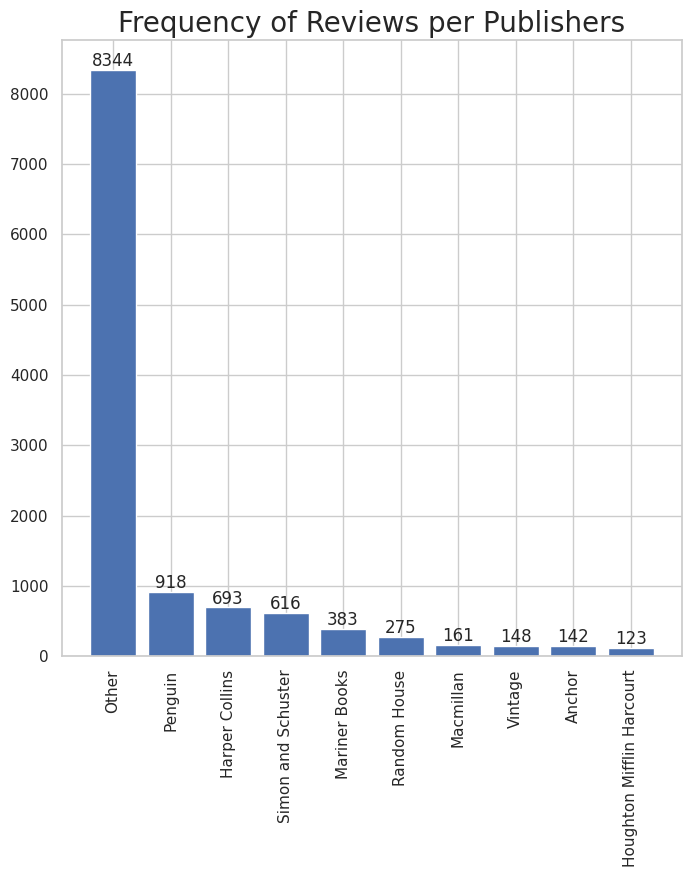

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['publisher'].value_counts(ascending = False).keys(), df_train['publisher'].value_counts(ascending = False))
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews per Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

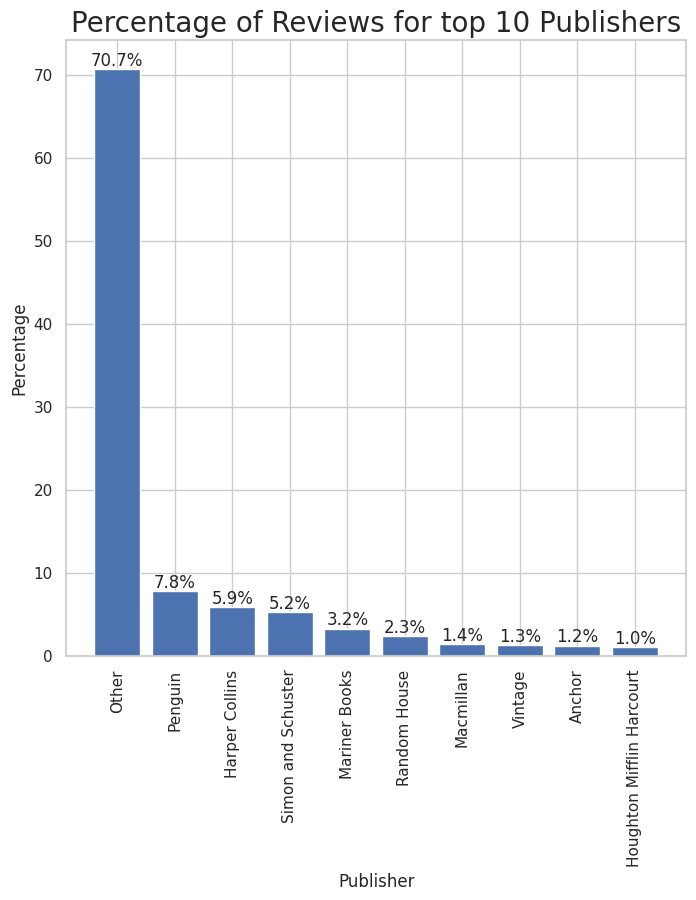

In [64]:
#Show a barplot by Percentages
author_percetage = df_train['publisher'].value_counts(ascending = False)/df_train['publisher'].value_counts(ascending = False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_train['publisher'].value_counts(ascending = False).keys(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


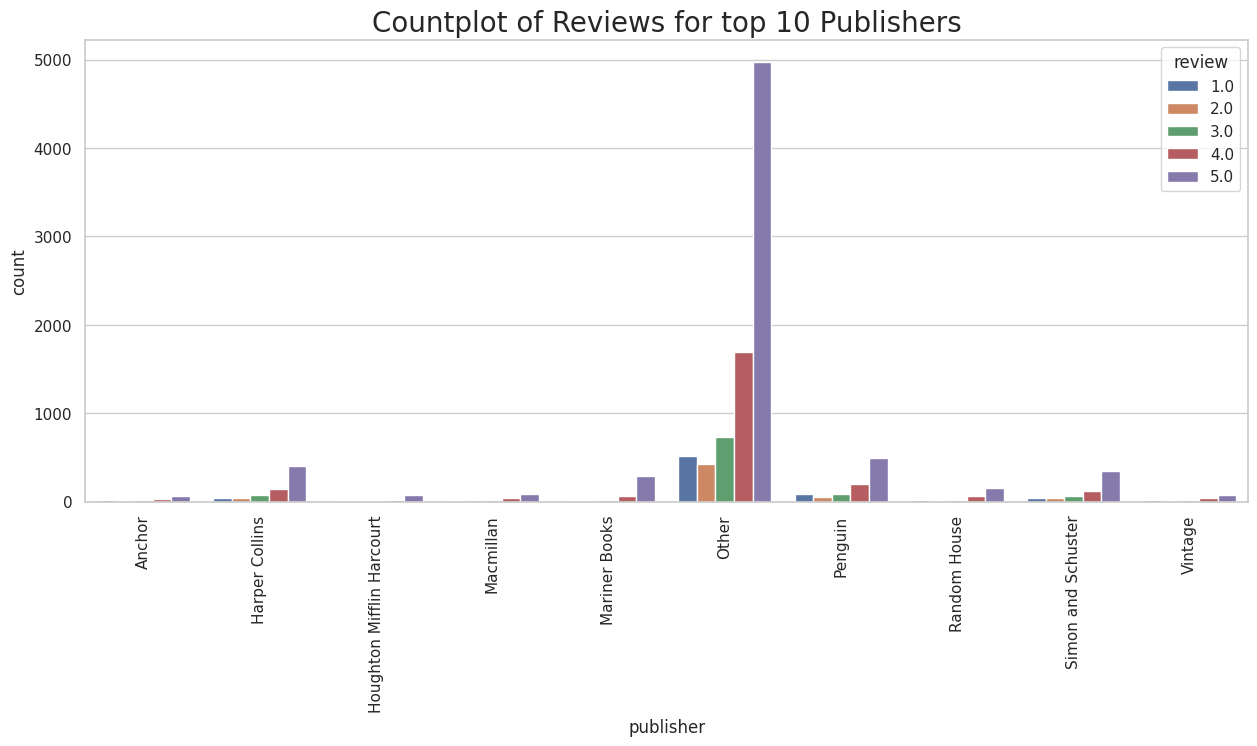

In [65]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_train, x = 'publisher', hue='review')
plt.title('Countplot of Reviews for top 10 Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [66]:
fig = px.box(df_train, x='publisher', y='review')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title='Interactive Box Plot of Review by Publisher',
    xaxis_title='Publisher',
    yaxis_title='Review'
)
fig.show()

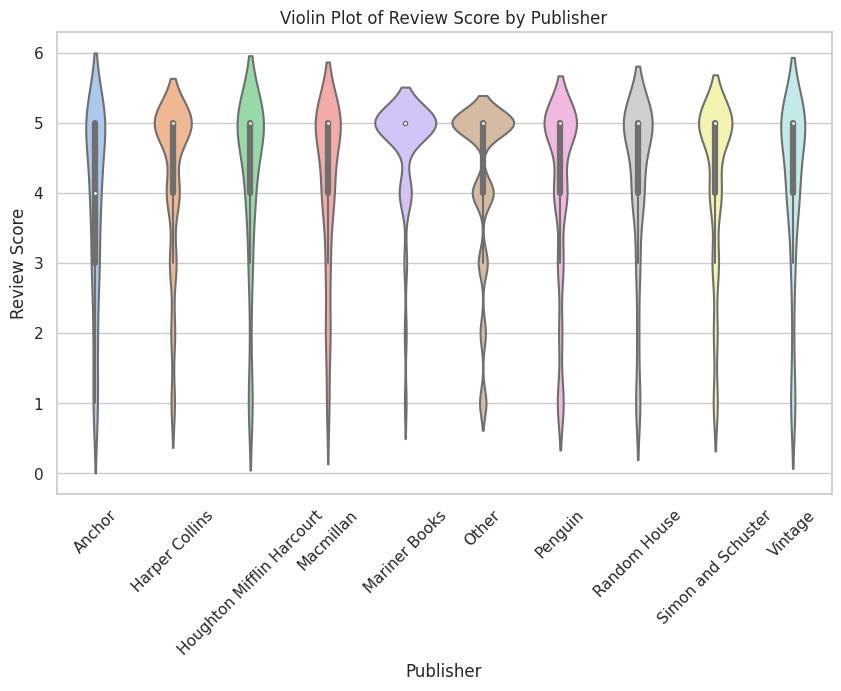

In [67]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='publisher', y='review', data=df_train, palette='pastel')
plt.xlabel('Publisher')
plt.ylabel('Review Score')
plt.title('Violin Plot of Review Score by Publisher')
plt.xticks(rotation=45) 
plt.show()


### Key Findings for Publisher

- All of the Top Publishers have a Review Score biased to high values. All of them but Macmillan have the 25% percentile above 4. Having the median value and 75% percentile on 5. 
- All of the Publishers have values on the 5 possible review scores. As it contains valid variability, this feature is kept.

## Compound Sentiment

This variable is the result of applying vader lexicon with NLTK library to the cleaned text review from the Dataset.

In [68]:
df_train.sample(2)

categories publisher  published_year  review_year  helpfulness  \
7395   Religion     Other            2005         2006          1.0   
3585    Fiction     Other            2008         2011          1.0   

                                             text_clean  compound_sentiment  \
7395  used book assist church ministry divorce care ...              0.4939   
3585  reviewer described background event samurai ga...              0.9022   

      text_complexity  word_count  review  
7395              6.0          25     5.0  
3585              7.5          39     5.0

In [69]:
df_train['compound_sentiment'].describe().T

count    11803.000000
mean         0.627536
std          0.513975
min         -0.998500
25%          0.557400
50%          0.855500
75%          0.952400
max          0.999900
Name: compound_sentiment, dtype: float64

compound_sentiment range goes from -1 to 1. As more near is the value to 1, more positive is the sentiment extracted from the text. And as more near to -1 is the value,
more negative is the sentiment predicted from the value.

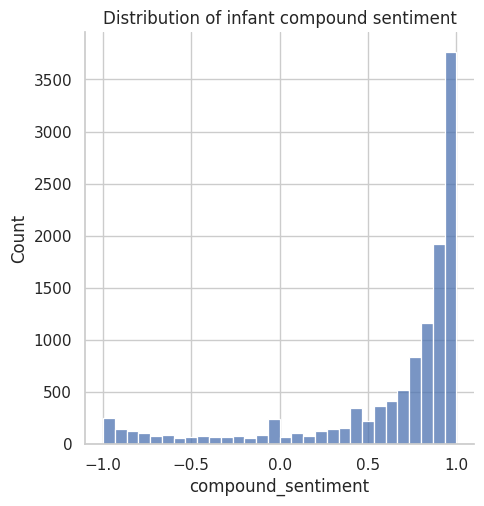

In [70]:
sns.displot(df_train['compound_sentiment'], bins=30)

plt.title('Distribution of infant compound sentiment')

plt.show()

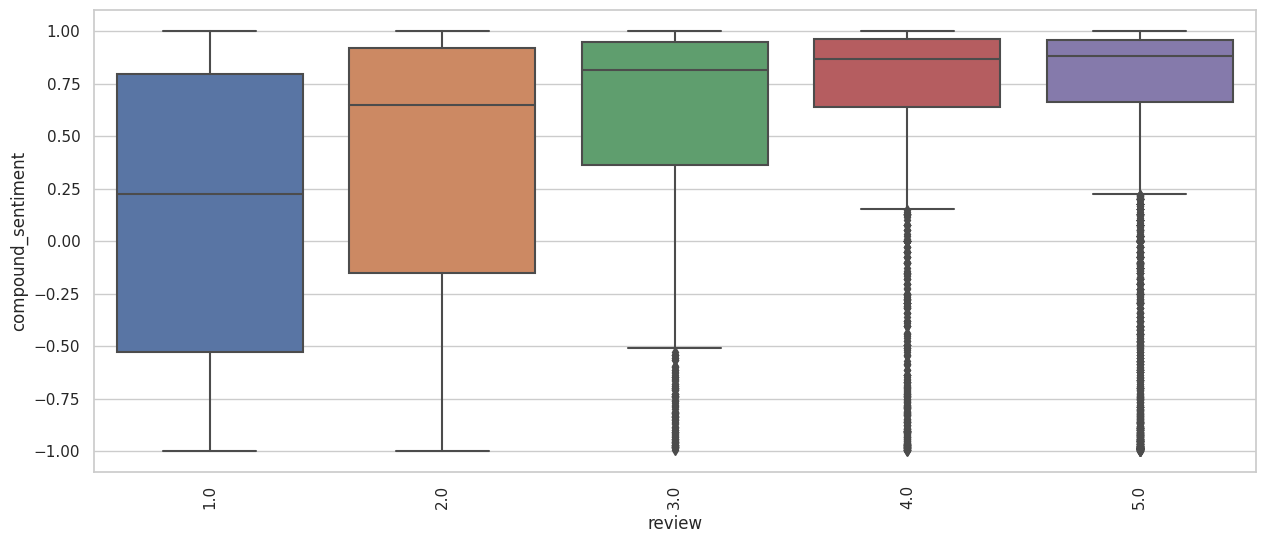

In [71]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='review', y='compound_sentiment', data=df_train)
plt.xticks(rotation=90)
plt.show()

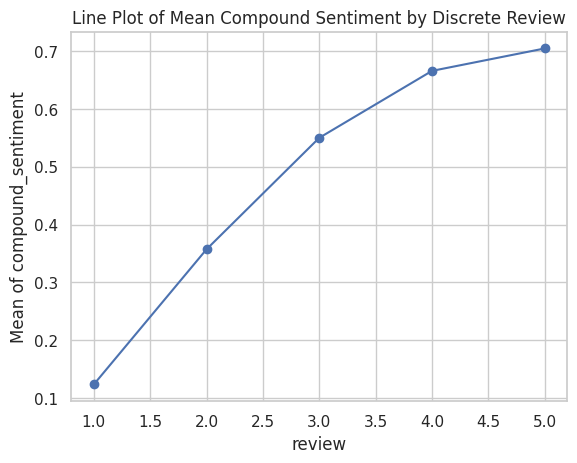

In [72]:
mean_by_review = df_train.groupby('review')['compound_sentiment'].mean()
mean_by_review.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('review')
plt.ylabel('Mean of compound_sentiment')
plt.title('Line Plot of Mean Compound Sentiment by Discrete Review')
plt.grid(True)
plt.show()

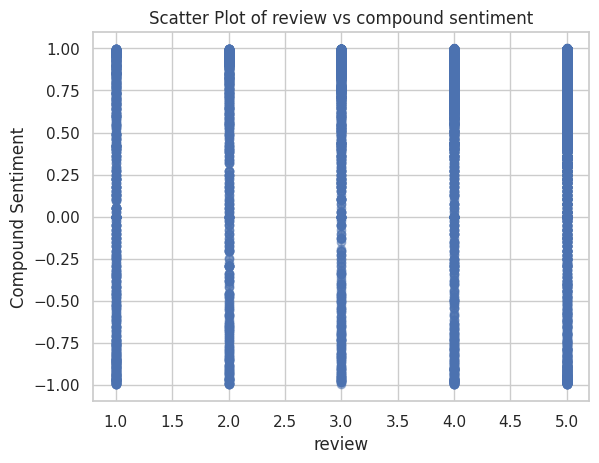

In [73]:
plt.scatter(df_train['review'], df_train['compound_sentiment'], alpha=0.5)
plt.xlabel('review')
plt.ylabel('Compound Sentiment')
plt.title('Scatter Plot of review vs compound sentiment')
plt.show()

In [74]:
df_train[['compound_sentiment', 'review']].corr().style.background_gradient(cmap='Blues')

### Key Findings for Compound Sentiment

- From the Distribution Plot, it is visible that Compound Sentiment Feature is biased to high levels/positive levels.
- The Boxplot figure shows the relation between review and compound sentiment. For High score reviews, the Compound sentiments tends to increase and be positive. And for Low Review Scores, the sentiment tends to be negative. This can explain the first bullet, because the dataset contains more entries with High Score Values, the positive Compound sentiment will increse.
- The line plot confirms the relationship between review and compound sentiment, plotting the mean of the compound sentiment for each review score. There is a positive relation. When review tends to be high, compound sentiment tends to be 1. 

## Text Complexity

 Flesch-Kincaid Grade Level readability score was used to estimate the readability and complexity of the text based on factors like sentence length and word difficulty

In [91]:
df_train.sample(3)

categories       publisher  published_year  review_year  helpfulness  \
10919    Fiction  Harper Collins            2009         2012          1.0   
1356       Other           Other            2008         2009          1.0   
11891    Fiction           Other            2010         2010          1.0   

                                                                                                                                                  text_clean  \
10919                                                                             one finest book ive ever read fell love danny dennis lehane best thank tou   
1356                                                                        book arrived good condition promised happy see copy novel read young girl thanks   
11891  sometime hard believe book written decade ago seems date plot timeless setting could anywhere country decade last year basic plot involves year ol...   

       compound_sentiment  text_complexity  word_count  review  
10919              0.8979              1.2          14     5.0  
1356               0.9231              3.4          13     5.0  
11891              0.7096              9.0          94     5.0

In [94]:
df_train['text_complexity'].describe().T

count    11803.000000
mean         7.310624
std          3.844521
min         -3.100000
25%          5.000000
50%          7.000000
75%          9.200000
max        232.200000
Name: text_complexity, dtype: float64

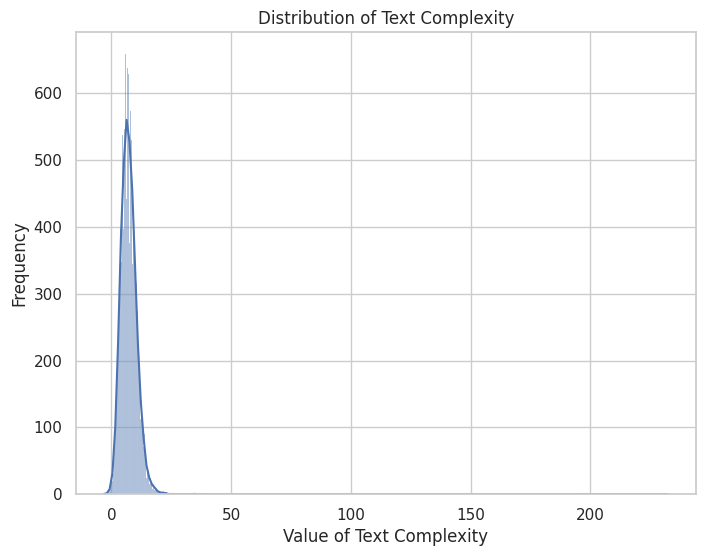

In [92]:
# Plot a histogram to visualize the distribution of the continuous variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='text_complexity', kde=True)
plt.title("Distribution of Text Complexity")
plt.xlabel("Value of Text Complexity")
plt.ylabel("Frequency")
plt.show()


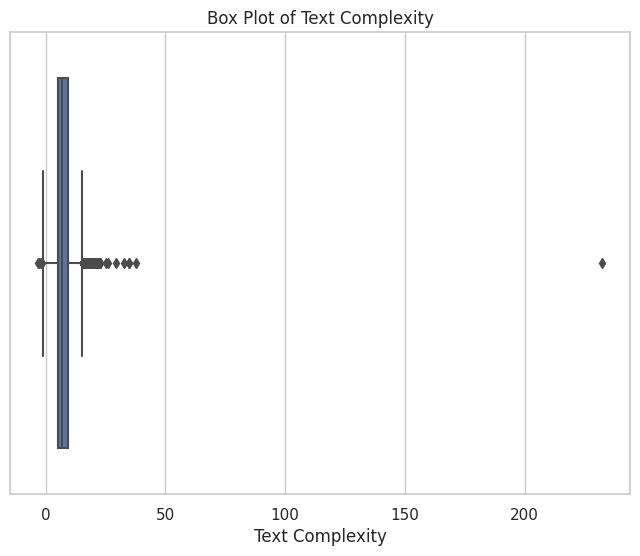

In [93]:

# Create a box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='text_complexity')
plt.title("Box Plot of Text Complexity")
plt.xlabel("Text Complexity")
plt.show()


In [ ]:

# Create a scatter plot to visualize the relationship between the continuous variable and another feature (e.g., a target variable)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Your_Continuous_Variable', y='Target_Variable')
plt.title("Scatter Plot: Your Continuous Variable vs. Target Variable")
plt.xlabel("Your Continuous Variable")
plt.ylabel("Target Variable")
plt.show()

In [ ]:
# Create a pair plot to visualize relationships between multiple continuous variables
sns.pairplot(data[['Your_Continuous_Variable', 'Another_Continuous_Variable']])
plt.show()

## EDA for Review Text Column

In [75]:
pd.set_option('display.max_colwidth', 150)

In [76]:
df_train[df_train['review']==5]['text_clean'].sample(5, random_state=1299)

414      receiving status book great condition order delivered time reading comment official guide great helpful prepare gmat test model exam practical exe...
105      really enjoy seires book janette oke great writer want contuniue read juat got next one series call heart canadian west break dawn canadian west book
15542    girlfriend recommended take class together likely would ever read book glad easiest read year mainly reading contemporary literature took brain mi...
5126                                                                                         beverly lewis doe another wonderful series make sure order hooked
2252                                                  great book eye opening must read student high school college adult age recommend whole uncle eric series
Name: text_clean, dtype: object

Word Cloud of most repeated 100 words on reviews with a review Score = 5. 


In [77]:
#FIXME Extraer texto por tipo de categoria

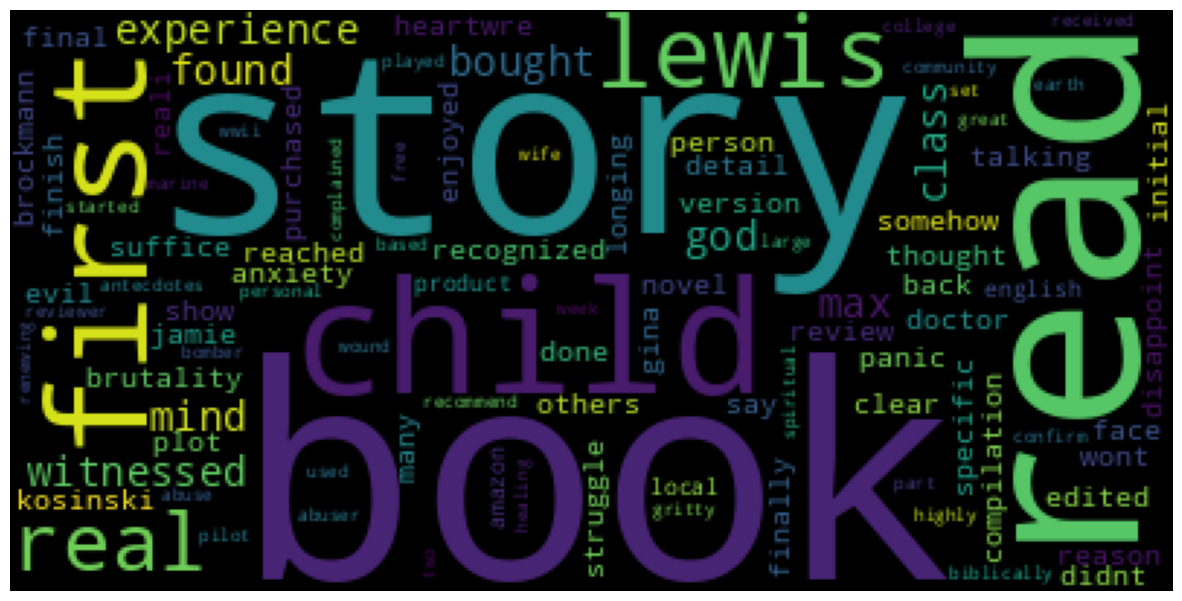

In [78]:
wordcloud5 = WordCloud(max_words=100).generate(str(df_train[df_train['review']==5]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [79]:
df_train[df_train['review']==1]['text_clean'].sample(5, random_state=1299)

14899    unclear everyone raving book found skipping paragraph dismayed cliche copy actually used avoided like plague character seemingly content woman fin...
12969    silent prey hallmark space filler book designed meet contractual obligation poorly paced set away place make prey series unique try hard clever ne...
6629             common sense information basically book provides give helpful information instead telling refer state law differ state state waste time money
12965    robert heinlein well know science fiction writer assumed tunnel sky would fairly well written boy wrong premise book interesting however character...
2820                                                           bought book think latest edition edition obviously although printed amazon specify edition book
Name: text_clean, dtype: object

In [80]:
df_train[df_train['review']==3]['text_clean'].sample(5, random_state=1299)

11957                                                   link table content chapter order read book fine good read still pain neck keep order book put together
9272     despite bad publicity memoir people later determined truthful genre still flourishing recently reviewed kid right story four welch sibling left or...
5851     first chapter schniedewind book bible became book present main question later went detail throughout book always controversy actually wrote bible ...
5468     read many susan book enjoyed one would enjoy character moralistic free favor loved book portrayed heroine much backbone realising potential loved ...
2390     wanting read book long time finally got interested subject followed story closely news time week half time many shooting mother road trip rhode is...
Name: text_clean, dtype: object

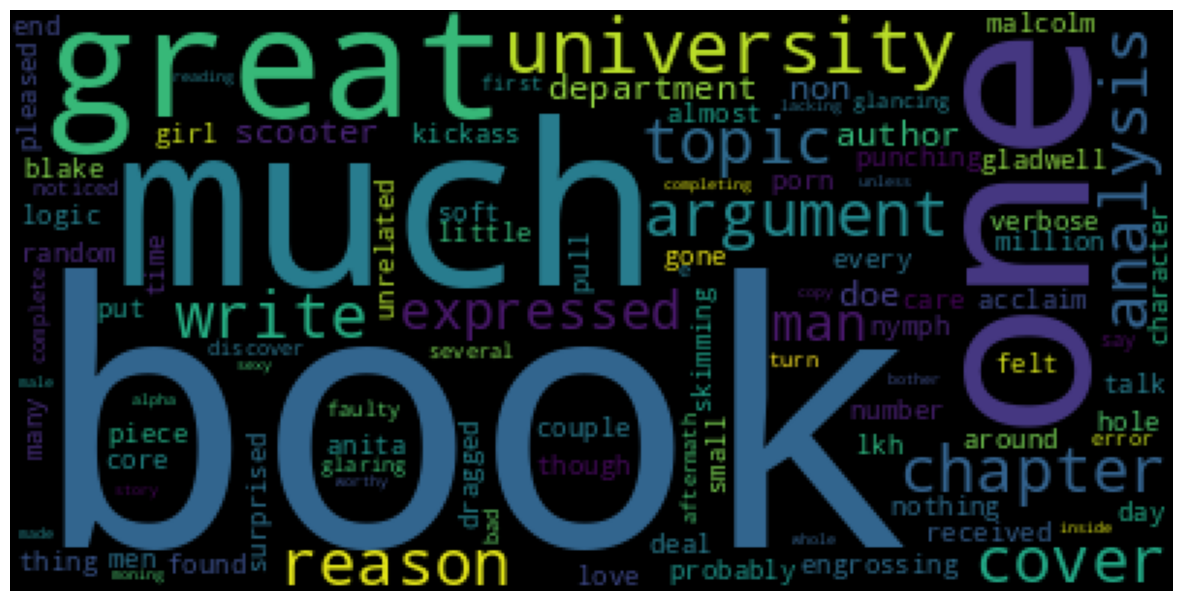

In [81]:
wordcloud1 = WordCloud(max_words=100).generate(str(df_train[df_train['review']==1]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

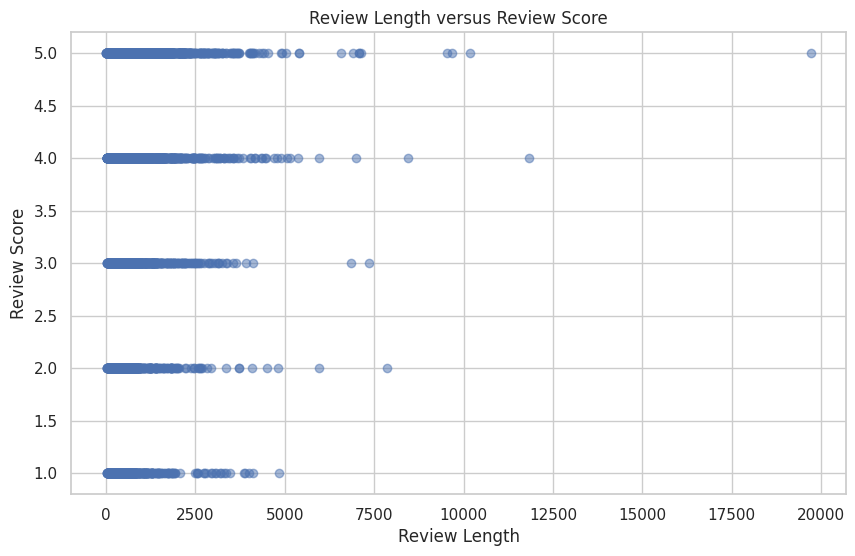

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['text_clean'].str.len(), df_train['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [83]:
df_train['text_clean'].str.len().mean()

475.83461831737696

In [84]:
df_train['text_clean'].str.len().std()

664.8748159305998

In [85]:
long_reviews = df_train[df_train['text_clean'].str.len() > 2000].copy()

len(long_reviews)

356

In [86]:
long_reviews.describe().T

count         mean         std        min          25%  \
published_year      356.0  2006.516854    2.435014  2004.0000  2004.000000   
review_year         356.0  2008.595506    2.776031  2004.0000  2006.000000   
helpfulness         356.0     0.802280    0.287264     0.0000     0.666667   
compound_sentiment  356.0     0.595090    0.737462    -0.9985     0.860550   
text_complexity     356.0    11.091011   12.035610     4.7000     8.700000   
word_count          356.0   426.806180  214.840220   257.0000   314.000000   
review              356.0     4.044944    1.193032     1.0000     3.000000   

                            50%        75%        max  
published_year      2006.000000  2008.0000  2013.0000  
review_year         2009.000000  2011.0000  2013.0000  
helpfulness            0.981428     1.0000     1.0000  
compound_sentiment     0.985500     0.9966     0.9999  
text_complexity       10.100000    12.0000   232.2000  
word_count           366.500000   466.0000  2725.0000  
review                 4.000000     5.0000     5.0000

In [87]:
long_reviews['text_clean'].str.len().mean()

3104.3314606741574

In [88]:
short_reviews = df_train[df_train['text_clean'].str.len() < 200].copy()

len(short_reviews)

4977

In [89]:
short_reviews['text_clean'].str.len().mean()

111.9324894514768

In [90]:
short_reviews.describe().T

count         mean       std       min          25%  \
published_year      4977.0  2007.772152  2.777653  2004.000  2005.000000   
review_year         4977.0  2010.536468  2.536376  2004.000  2009.000000   
helpfulness         4977.0     0.815449  0.347232     0.000     0.833333   
compound_sentiment  4977.0     0.612032  0.395150    -0.967     0.476700   
text_complexity     4977.0     5.577034  2.842481    -3.100     3.700000   
word_count          4977.0    16.830219  6.345105     1.000    12.000000   
review              4977.0     4.349407  1.110403     1.000     4.000000   

                         50%       75%       max  
published_year      2007.000  2010.000  2013.000  
review_year         2012.000  2012.000  2013.000  
helpfulness            1.000     1.000     1.000  
compound_sentiment     0.765     0.886     0.992  
text_complexity        5.200     7.100    25.900  
word_count            16.000    22.000    34.000  
review                 5.000     5.000     5.000

In [ ]:
high_reviews = df_train[df_train['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

In [ ]:
neutral_reviews = df_train[df_train['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

In [ ]:
low_reviews = df_train[df_train['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

In [ ]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
plt.figure()
plt.hist2d(df_train['review_year'], df_train['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[df_train['review'] != 5]['review_year'], df_train[df_train['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[(df_train['review'] != 4) & (df_train['review'] != 5)]['review_year'], df_train[(df_train['review'] != 4) & (df_train['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_train[df_train['review_year'] <= 2000]['review_year'], df_train[df_train['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

# Multivariable Analysis

In [ ]:
df_train.info()

In [ ]:
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

In [ ]:


#Histogram with SNS

numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.histplot(df_train[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=df_train, x= 'compound_sentiment', y='helpfulness')
plt.show()

In [ ]:
sns.pairplot(data=df_train, hue='review')
plt.show()

# Final Findings from EDA.

- Categorical features Authors, Publisher and Categories are biased to high score values. But have an important variability shown in the countplot figures. So, they will be kept. The model training and testing results with and without using the features, and the crossvalidation will determine if the variables should be removed.


# Model Selection, Training and Testing

- The current project is a regression exercise for predicting a continous value for the Review Score of the Review.
- The dataset contains multiple features. Some of the Categorical which are stored on lists (authors and Categories), a Cateogorical feature Publisher. 
- The dataset contains 4 numerical features, where we have discrete variables (published year, review_year) and continuos variables (helpfulness and compund_sentiment)
- Lastly, the dataset contains a text column that will be vectorized.

- Authors and Categories will be processed with One Hot Encoding, creating a Column for each category in the list. 
- Publisher will be encoded as well

In [ ]:
X_train.sample(1)


In [ ]:
# Preprocessing for text data
text_vectorizer = TfidfVectorizer()
text_features_train = text_vectorizer.fit_transform(X_train['text_clean'])
text_features_test = text_vectorizer.transform(X_test['text_clean'])

In [ ]:
text_features_train

In [ ]:
pca = PCA(n_components=5, random_state=2109)

In [ ]:
text_features_train_pcaed = pca.fit_transform(text_features_train.toarray())
text_features_test_pcaed = pca.transform(text_features_test.toarray())

In [ ]:
text_features_train_pcaed

In [ ]:
scaler = StandardScaler()
numerical_features_scaled_train = scaler.fit_transform(X_train[['published_year', 'review_year']])
numerical_features_scaled_test = scaler.transform(X_test[['published_year', 'review_year']])

In [ ]:
numerical_features_nonscaled_train = X_train[['helpfulness', 'compound_sentiment']]
numerical_features_nonscaled_test = X_test[['helpfulness', 'compound_sentiment']]

In [ ]:
enconder = OneHotEncoder()
categorical_features_train = enconder.fit_transform(X_train[['categories','publisher']])
categorical_features_test = enconder.transform(X_test[['categories','publisher']])

In [ ]:
categorical_features_train

In [ ]:
X_train_final = np.concatenate((text_features_train_pcaed, categorical_features_train.toarray(), numerical_features_scaled_train, numerical_features_nonscaled_train), axis=1)
X_test_final = np.concatenate((text_features_test_pcaed, categorical_features_test.toarray(), numerical_features_scaled_test, numerical_features_nonscaled_test), axis=1)

# X_train_final = np.concatenate((text_features_train_pcaed, numerical_features_scaled_train, numerical_features_nonscaled_train), axis=1)
# X_test_final = np.concatenate((text_features_test_pcaed, numerical_features_scaled_test, numerical_features_nonscaled_test), axis=1)

# X_train_final = np.concatenate((text_features_train_pcaed, numerical_features_nonscaled_train), axis=1)
# X_test_final = np.concatenate((text_features_test_pcaed, numerical_features_nonscaled_test), axis=1)


In [ ]:
X_train_final.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [ ]:
model_rf.fit(X_train_final, y_train)

In [ ]:
y_hat_rfr = model_rf.predict(X_test_final)
y_hat_rfr

In [ ]:
print(f"Random Forest Regressor: Mean squared error: {mean_squared_error(y_test, y_hat_rfr):.4f}")
print(f"Random Forest Regressor: Coefficient of determination: {r2_score(y_test, y_hat_rfr):.4f}")

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel = "rbf", C = 1.0, gamma = 0.5)
model_svm.fit(X_train_final, y_train)

In [ ]:
y_pred_svm = model_svm.predict(X_test_final)
y_pred_svm

In [ ]:
print(f"SVM: Mean squared error: {mean_squared_error(y_test, y_pred_svm):.4f}")
print(f"SVM: Coefficient of determination: {r2_score(y_test, y_pred_svm):.4f}")

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
model_ls = Lasso(random_state=2014)

In [ ]:
model_ls.fit(X_train_final, y_train)

In [ ]:
y_pred_lasso = model_ls.predict(X_test_final)
y_pred_lasso

In [ ]:
print(f"Lasso: Mean squared error: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Lasso: Coefficient of determination: {r2_score(y_test, y_pred_lasso):.4f}")

In [ ]:
# label_encoder_publisher = LabelEncoder()

In [ ]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=1.0)#min_df: Flotante de 0 a 1, Entero: La cuenta. cuantas veces tiene que haber aparecido la palabra para considerarla o eliminar

In [ ]:
# X_train_text_clean_vec = vectorizer.fit_transform(X_train['text_clean'])

In [ ]:
# X_train_text_clean_vec.shape

In [ ]:
# vectorizer.get_feature_names_out()

In [ ]:
# X_train['text_clean_vec']

In [ ]:
# pca = PCA(n_components=5, random_state=2109)
# pca_vecs = pca.fit_transform(X_train_text_clean_vec.toarray())

In [ ]:
# pca_df = pd.DataFrame()

# labels = y_train.reset_index(drop=True)

# pca_df['x_0'] = pca_vecs[:,0] #Todas las filas :,   | Columna 0
# pca_df['x_1'] = pca_vecs[:,1] #Todas las filas :,   | Columna 1
# pca_df['x_2'] = pca_vecs[:,2] #Todas las filas :,   | Columna 1
# pca_df['x_3'] = pca_vecs[:,3] #Todas las filas :,   | Columna 1
# pca_df['x_4'] = pca_vecs[:,4] #Todas las filas :,   | Columna 1
# pca_df['review'] = labels

In [ ]:
# sns.scatterplot(data=pca_df, x='x_3', y='x_4', hue='review')

In [ ]:
# pca_vecs